In [16]:
# Loading Python libraries

# Data manipulation libraries
import numpy as np
import pandas as pd

# Machine learning libraries

# Correlation
from scipy import stats

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# Data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Dimensionality reduction
from sklearn.decomposition import PCA

# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use("ggplot")
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 7

# Web libraries
import requests

In [3]:
# Load the dataset using pandas

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/" \
        "breast-cancer-wisconsin/wdbc.data",
    header=None
)

In [8]:
# Separate diagnosis (malignant and benign) and feature columns

ids, diagnosis, *features = df.T.to_numpy()

# With *features a list is created. Convert to numpy array. 
features = np.asarray(features, dtype=np.float64).T

In [5]:
diagnosis

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [10]:
features.shape

(569, 30)

In [38]:
# Set the number of features
num_features = features.shape[1]

# Define a zero 2D numpy matrix of shape (number_of_features, number_of_features)
correl_mat = np.zeros((num_features, num_features))

# Calculate pair-wise correlations between each features
for i in range(num_features):
    for j in range(num_features):
        correl_mat[i,j] = stats.pearsonr(features[:,i:i+1], features[:, j:j+1])[0]

Text(0.5, 1.0, 'Pairwise Pearson correlations between dataset features')

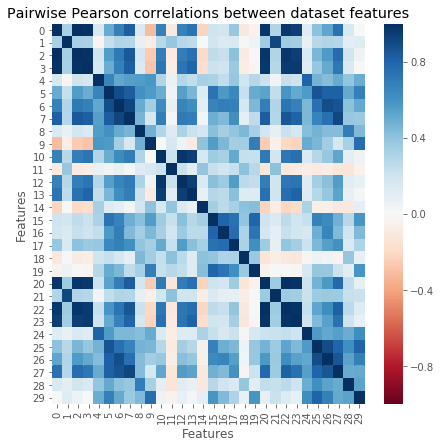

In [48]:
# Plot heatmaps of pair-wise correlations
sns.heatmap(correl_mat, vmin=-1, vmax=1, cmap="RdBu")
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Pairwise Pearson correlations between dataset features")

In [6]:
# Transform diagnosis labels
# B -> 0, M -> 1
diagnosis = LabelEncoder().fit_transform(diagnosis)

In [7]:
diagnosis

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
# Define the proportion between training and test datasets
proportion = 0.2

# Split the dataset (random_state for analysis reproducibility)
features_train, features_test, diagnosis_train, diagnosis_test = \
    train_test_split(features, diagnosis, test_size=proportion, random_state=1) 

In [9]:
# Original data size vs train vs test
features.shape, features_train.shape, features_test.shape

((569, 30), (455, 30), (114, 30))

In [10]:
features_train

array([[1.799e+01, 2.066e+01, 1.178e+02, ..., 1.974e-01, 3.060e-01,
        8.503e-02],
       [2.029e+01, 1.434e+01, 1.351e+02, ..., 1.625e-01, 2.364e-01,
        7.678e-02],
       [9.000e+00, 1.440e+01, 5.636e+01, ..., 1.389e-02, 2.991e-01,
        7.804e-02],
       ...,
       [1.720e+01, 2.452e+01, 1.142e+02, ..., 1.899e-01, 3.313e-01,
        1.339e-01],
       [1.403e+01, 2.125e+01, 8.979e+01, ..., 7.963e-02, 2.226e-01,
        7.617e-02],
       [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
        6.169e-02]])

In [11]:
features_test

array([[1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       [1.317e+01, 1.866e+01, 8.598e+01, ..., 2.088e-01, 3.900e-01,
        1.179e-01],
       [1.295e+01, 1.602e+01, 8.314e+01, ..., 1.056e-01, 3.380e-01,
        9.584e-02],
       ...,
       [9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [1.453e+01, 1.934e+01, 9.425e+01, ..., 9.594e-02, 2.471e-01,
        7.463e-02],
       [1.378e+01, 1.579e+01, 8.837e+01, ..., 3.312e-02, 1.859e-01,
        6.810e-02]])

In [12]:
diagnosis_train

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [13]:
diagnosis_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

### Comparison of statistical models to investigate the data

### Linear regression

In [14]:
# Initialise Linear Regression
linreg = LinearRegression()

# Fit linear regression model based on training data
linreg.fit(features_train, diagnosis_train)

# Predict labels based on test dataset
diagnosis_pred = linreg.predict(features_test)

# Get the results
# The mean squared error
print('Mean square error:', mean_squared_error(diagnosis_test, diagnosis_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:', r2_score(diagnosis_test, diagnosis_pred))

Mean square error: 0.06352676895179125
Variance score: 0.7269861477190875
